In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_final.csv')
df.head()

,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,SCL90_IDEA_PARAN,CAPE_POSIT_FREC,TRAUMA_FRECUENCIA,SPQ_TOTAL_ESQUIZOT
0,17,5,0,7,5,13,2,20,0,24,4,0
1,13,11,3,6,11,17,11,17,1,22,9,0
2,20,20,20,11,8,3,0,20,1,30,12,1
3,12,1,0,4,6,3,1,18,0,20,4,0
4,8,9,17,4,14,2,6,27,17,35,17,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 85% de los datos para entrenamiento y un 15% de los datos para validación
valid_idx  =  range ( len ( df ) - 43 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['TRAUMA_FRECUENCIA', 'CSI_AUTOCRIT', 'CSI_RETISOC', 'CAPE_POSIT_FREC', 'CSI_RESPROBL', 'ANSIEDADRASGO', 'SCL90_IDEA_PARAN', 'CSI_PENSDESID', 'CSI_REESTCOGN', 'CSI_APOYOSOC', 'CSI_EVITPROBL']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-0.183244  1.027299  0.022635 -0.314949 ...  0.438935  0.344207  0.421665  0.336134]
 [ 0.005435  0.67446  -1.246687  0.326834 ... -0.892251  1.273567  1.605248 -0.324356]
 [-1.220978 -0.207638  0.234189 -0.956732 ... -0.393056 -0.399281 -0.085585  0.556298]
 [-0.371923 -1.266155  1.715065 -0.475395 ... -1.557843  1.645311  1.267081  1.436952]
 [-0.371923 -0.384057 -0.400472 -0.154503 ... -1.557843 -0.771025 -0.423752 -0.54452 ]]
[1 0 0 0 0]


In [9]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.026391,1.002214,0.627907,05:00
1,0.863318,0.949317,0.651163,02:56
2,0.779053,0.926389,0.651163,03:44
3,0.711575,0.905586,0.627907,03:31
4,0.673684,0.892656,0.697674,03:04


TRAUMA_FRECUENCIA,CSI_AUTOCRIT,CSI_RETISOC,CAPE_POSIT_FREC,CSI_RESPROBL,ANSIEDADRASGO,SCL90_IDEA_PARAN,CSI_PENSDESID,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EVITPROBL,target,prediction
-0.3719,2.0858,-0.8236,-0.1545,-0.7208,0.3519,-0.8979,0.7717,-0.3993,1.6052,1.6571,0,0
-0.9380,-0.5605,-0.4005,-0.3149,1.5119,-0.7190,-0.8979,-1.2250,1.8312,-0.0856,-0.5445,0,0
-0.7493,0.4980,0.2342,-0.1545,-0.3149,0.1990,1.2508,0.1061,0.3442,-0.0856,0.3361,0,1
1.9866,-0.3841,2.5613,-0.3149,-1.5327,-1.0250,0.0788,0.6053,-1.1428,-1.4383,2.7579,1,0
-0.3719,0.4980,1.0804,-0.1545,-1.7357,-0.8720,1.4461,-1.0586,-1.7004,-1.6073,-1.2050,1,0


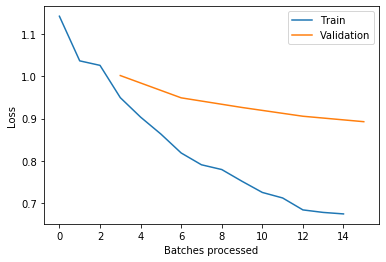

In [10]:
learn.recorder.plot_losses()
learn.show_results()